# Complex Numbers in Python

Contributors: Daniel Lay, TODO

A complex number $z=x+iy$ has a real part, $x$, and an imaginary part, $y$. In this notebook, we'll discuss:

- How to use complex numbers in Python, including common pitfalls
- When complex numbers show up in physics, and some basic numerical methods for such problems
- The Fourier transformation
- Contour integration, and how to visualize it

## The Basics

Python has native support for complex numbers. To write a complex number, such as $3+4i$, you write the code '3+4 * 1j':

In [2]:
my_complex_number = 3 + 4*1j
print("type(my_complex_number):",type(my_complex_number))

type(my_complex_number): <class 'complex'>


As you can see, the variable 'my_complex_number' is of class 'complex', which is Python's way of saying it's a complex number. Additionally, some operations respect that this is a complex number. For instance, the 'abs' function now behaves as the mathematical operation $|z|=\sqrt{x^2+y^2}$, as we can check with our complex variable:

In [3]:
print('abs(my_complex_number):',abs(my_complex_number))

abs(my_complex_number): 5.0


As with most mathematical operations you've encountered (e.g. matrix operations), it is easier to work with numpy, and indeed, numpy has support for complex numbers. You can make an array like normal, except with complex entries:

In [4]:
import numpy as np

my_complex_array = np.array([3+4*1j,5+6.7*1j])
print('my_complex_array:',my_complex_array)

my_complex_array: [3.+4.j  5.+6.7j]


To check that this is a complex array, you can print 'my_complex_array.dtype' (if you instead type 'type(my_complex_array)', you just get np.ndarray back - Python can't tell the type of data inside of a numpy array):

In [5]:
print('my_complex_array.dtype:',my_complex_array.dtype)

my_complex_array.dtype: complex128


**Conceptual check number** TODO: how would you implement the Pauli matrices in numpy?

Numpy also lets you multiply by scalars (real or complex), like you would expect:

In [6]:
print('2 * my_complex_array:',2*my_complex_array)
print('1j * my_complex_array):',1j*my_complex_array)
print('(2+3*1j) * my_complex_array):',(2+3*1j)*my_complex_array)

2 * my_complex_array: [ 6. +8.j  10.+13.4j]
1j * my_complex_array): [-4. +3.j -6.7+5.j]
(2+3*1j) * my_complex_array): [ -6. +17.j  -10.1+28.4j]


And, you can take the complex conjugate of the array (element-wise):

In [7]:
print('my_complex_array:',my_complex_array)
print('np.conjugate(my_complex_array):',np.conjugate(my_complex_array))

my_complex_array: [3.+4.j  5.+6.7j]
np.conjugate(my_complex_array): [3.-4.j  5.-6.7j]


**Conceptual check number** TODO: how would you take the *Hermitian conjugate* of 'my_complex_array' (i.e. the conjugate transpose)?

If you decide that you only care about the real part of an array, numpy lets you access that nicely:

In [8]:
print('np.real(my_complex_array):',np.real(my_complex_array))

np.real(my_complex_array): [3. 5.]


Suppose we want to use 'my_complex_array' somewhere else in our code - say, we want to make it the first two elements in a different array (e.g. when iteratively solving some system of equations). How might we do that? First, we initialize our array 'another_variable' like normal:

In [9]:
another_variable = np.zeros(5)

Now, let's make the first two elements equal to 'my_complex_array':

In [10]:
another_variable[:2] = my_complex_array
print('another_variable:',another_variable)

another_variable: [3. 5. 0. 0. 0.]


C:\Users\1josh\AppData\Local\Temp\ipykernel_4284\241474597.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  another_variable[:2] = my_complex_array


Oops! What happened?

You see a 'ComplexWarning' showed up. The issue is exactly as stated: numpy is discarding the imaginary part of 'my_complex_array'. In this case, it's because you started with an array of a *real* datatype, and numpy, rather than making 'another_variable' complex, takes the *real* part of 'my_complex_array'.

This is a common occurrence, and you should be aware of it. It happens especially in non-numpy functions, such as when plotting an array.

## The Fourier Transform

The Fourier transform is the backbone of an enormous amount of computational efforts - see https://en.wikipedia.org/wiki/Fourier_transform#Applications for examples. As such, it is implemented in an efficient manner via the *fast Fourier transform* (FFT). The Fourier transform, more than perhaps any other algorithm, is something you do *not* want to implement yourself - I can all but guarantee that numpy's implementation will be faster, and probably by orders of magnitude.

Numpy implements the FFT in the package numpy.fft, https://numpy.org/doc/stable/reference/routines.fft.html. To understand it, let's start with an example we can compute by hand:

$$ f(x) = \sin(x). $$

The Fourier transform is best accomplished by writing $f(x)$ as complex exponentials, so
\begin{align}
    f(x)=\frac{e^{ix}-e^{-ix}}{2i}.
\end{align}
Then, the Fourier transform is
\begin{align}
    \tilde{f}(k)=\frac{1}{2i}\int_{-\infty}^\infty dx\,e^{i2\pi kx}f(x)=\frac{1}{2i}\big[ \delta(k-1/2\pi)-\delta(k+1/2\pi)\big].
\end{align}
This dependence could have been read off with a little practice.

To accomplish this numerically, we first evaluate $f(x)$ on a grid, then use the np.fft package. When doing so, be aware that our convention above follows the convention used in numpy, https://numpy.org/doc/stable/reference/routines.fft.html#implementation-details, and your programming language of choice may use something different.

In [11]:
def f(x):
    return np.sin(x)

x = np.arange(256)

fEval = f(x)

my_fft = np.fft.fft(fEval)

print('my_fft:')
print(my_fft)

my_fft:
[ 1.45126613e+00+0.00000000e+00j  1.45189004e+00+2.66891368e-02j
  1.45376631e+00+5.34673357e-02j  1.45690866e+00+8.04247362e-02j
  1.46134019e+00+1.07653659e-01j  1.46709386e+00+1.35249768e-01j
  1.47421310e+00+1.63313315e-01j  1.48275261e+00+1.91950518e-01j
  1.49277947e+00+2.21275087e-01j  1.50437447e+00+2.51409977e-01j
  1.51763382e+00+2.82489403e-01j  1.53267128e+00+3.14661208e-01j
  1.54962069e+00+3.48089662e-01j  1.56863925e+00+3.82958819e-01j
  1.58991146e+00+4.19476588e-01j  1.61365410e+00+4.57879702e-01j
  1.64012240e+00+4.98439862e-01j  1.66961782e+00+5.41471395e-01j
  1.70249797e+00+5.87340899e-01j  1.73918920e+00+6.36479532e-01j
  1.78020296e+00+6.89398810e-01j  1.82615706e+00+7.46711196e-01j
  1.87780384e+00+8.09157253e-01j  1.93606788e+00+8.77641946e-01j
  2.00209715e+00+9.53283951e-01j  2.07733383e+00+1.03748371e+00j
  2.16361384e+00+1.13201921e+00j  2.26330990e+00+1.23918346e+00j
  2.37954197e+00+1.36198683e+00j  2.51649514e+00+1.50446259e+00j
  2.67991526e+00+

Well, that was... lackluster. Let's plot the fft instead.

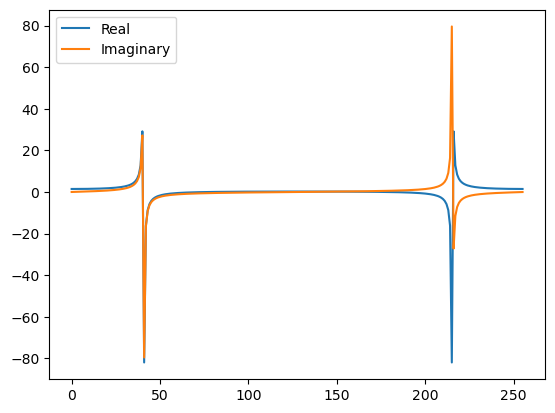

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(np.real(my_fft),label='Real')
ax.plot(np.imag(my_fft),label='Imaginary')

ax.legend()


Well, that looks weird. We see that there are two large frequencies, but they're not where we expect them to be.

To actually get the *frequencies* of the Fourier transform, we can use numpy.fft.fftfreq (see https://stackoverflow.com/a/59979450 for a well-explained example):

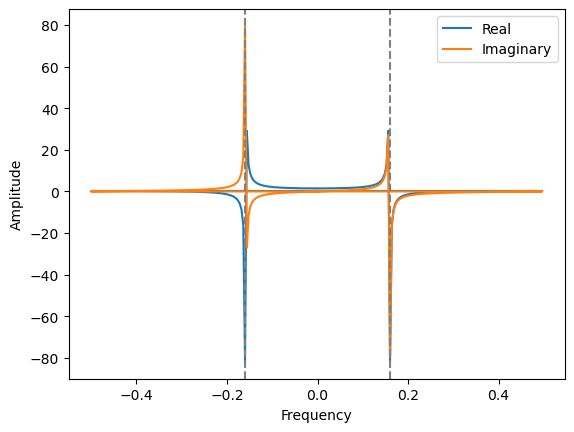

In [13]:
myFrequencies = np.fft.fftfreq(len(my_fft))

expectedFrequencies = [-1/(2*np.pi),1/(2*np.pi)]

fig, ax = plt.subplots()

ax.plot(myFrequencies,np.real(my_fft),label='Real')
ax.plot(myFrequencies,np.imag(my_fft),label='Imaginary')

ax.legend()
ax.set(xlabel='Frequency',ylabel='Amplitude')

for freq in expectedFrequencies:
    ax.axvline(freq,color='gray',ls='--')


Now, we see the peaks about where we expect them to be, which we double check by marking vertical lines on the same plot, at our expected frequencies. So, the FFT is indeed working as expected.

I will note that the *amplitude* of the FFT is not the simple $1/(2i)$ we expect from before. I believe that's due to an additional normalization factor numpy uses in its definition of the Fourier transform.

Lastly, I'll show an example with a more complicated function: one where you may not be able to visually identify the frequencies. Here, I'll take two oscillating functions, with very different frequencies and very different amplitudes:

$$ f(x) = \sin(x) + 0.01\sin(40x). $$

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

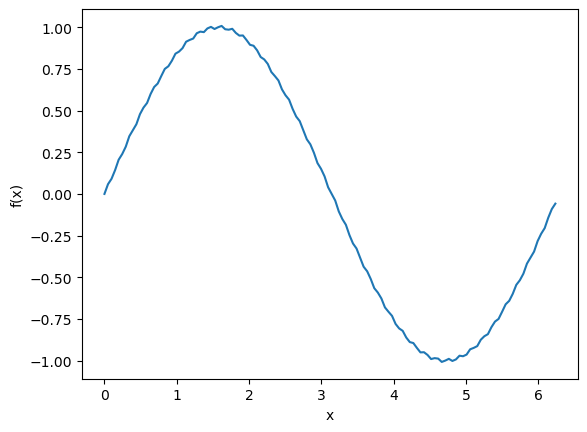

In [14]:
x = np.linspace(0,2*np.pi,128,endpoint=False)

f = lambda x: np.sin(x) + 0.01 * np.sin(40*x)
fEval = f(x)

fig, ax = plt.subplots()
ax.plot(x,fEval)

ax.set(xlabel='x',ylabel='f(x)')

By visually inspecting the plot, you clearly see the $\sin(x)$ behavior. If you look closely, you also see small oscillations around that - especially near the max/min values of $\sin(x)$. If you encounter this in *data*, however, it may be difficult to tell - is that real behavior, or is it just noise? 

The Fourier transform can help answer this, by looking at the frequencies that show up. In our example, we expect four frequencies: $\pm 1/(2\pi)$ and $\pm 1/(80\pi)$. What does the FFT recover?

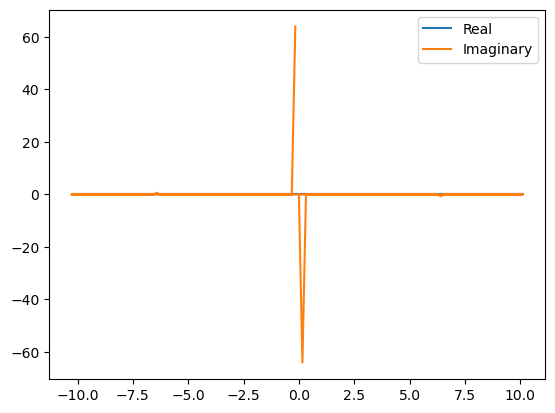

In [15]:
fftEval = np.fft.fft(fEval)

#When generating the frequencies, you have to tell numpy the sampling rate
sampleRate = len(x)/x[-1]
myFrequencies = np.fft.fftfreq(len(fftEval),d=1/sampleRate)

fig, ax = plt.subplots()
ax.plot(myFrequencies,np.real(fftEval),label='Real')
ax.plot(myFrequencies,np.imag(fftEval),label='Imaginary')

ax.legend()

You can see two large lines, and, if you squint, two smaller lines. That makes some sense - the amplitude of the high-frequency oscillation is much smaller than the low-frequency oscillation.

To extract the actual numbers, we can use numpy to look for maxima in the imaginary part of the FFT. There are a lot of different ways to do this; one way is as follows:

In [16]:
imagPart = np.abs(np.imag(fftEval))

#Finding desired indices
peakIndices = np.where(imagPart > 0.0001)
print('peakIndices:',peakIndices)
#Getting the frequency at those indices
print('Frequencies:',myFrequencies[peakIndices])

#What we expect
print('Expected frequencies:',[-1/(2*np.pi),1/(2*np.pi),-40/(2*np.pi),40/(2*np.pi)])

peakIndices: (array([  1,  40,  88, 127], dtype=int64),)
Frequencies: [ 0.16040813  6.41632526 -6.41632526 -0.16040813]
Expected frequencies: [-0.15915494309189535, 0.15915494309189535, -6.366197723675814, 6.366197723675814]


As you can see, the frequencies we get are pretty close to the expected values. To improve the agreement, we have to increase the number of sample points beyond 128 - give it a try!


# Differential Equation Example

Complex numbers commonly arise in differential equations. For example, consider the following equation of motion

$$
\begin{align}
\frac{d^{2}x}{dt^{2}} + 2\gamma \frac{dx}{dt} + \omega^{2} x = 0 \\
x(t = 0) = 0, \hspace{3mm} \frac{d x}{dt}(t = 0) = 1
\end{align}
$$
where $\gamma$ and $\omega$ are real numbers. This is Newton's second law for a harmonic oscillator with frequency $\omega$ however we added a first derivative term. The first derivative acts as a "friction term" that causes damping of the harmonic motion. The number $\gamma$ characterizes the strength of the friction.  We will solve this analytically and numerically using Scipy's ODE solver.

<details>
  <summary>If you've forgotten how to generally solve a second order differential equation, click here to see a reminder.</summary>

  ---

  At our current point, we've identified the importance of derivatives and integrals in physics. For integrals, the ability to sum over (or include) many microscopic effects like instantaneous velocity or position over a set space lets us learn about the object's trajectory or displacement in said space. As an example, we can consider the harmonic oscillator equation of motion

  \begin{equation}
      \frac{d^2x}{dt^2} + \frac{k}{m} x = 0
  \end{equation}

  which belongs to a more general type of differential equation

  \begin{equation}
      a \frac{d^2x}{dt^2} + b \frac{dx}{dt} + c x = 0.
  \end{equation}

  The roots to our differential equation are found by substituting

  \begin{equation}
      a D^2 + b D + c = 0.
  \end{equation}

  with the solution

  \begin{equation}
      D = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}, \quad {\rm and}\quad \Omega = b^2 - 4ac.
  \end{equation}

  The reason we are doing this is quite similar to solving for the roots of a quadratic equation. Finding the roots tells us about the fundamental behavior of a system.

  There are three possible cases to this equation
  1. $\Omega > 0$: In this case we see the square root term is positive and produce two real roots due to the $\pm \sqrt{\Omega}$ term. The general solution is then

  \begin{equation}
      x(t) = c_1 e^{D_1 t} + c_2 e^{D_2 t} \quad {\rm where}\quad D_1 = \frac{-b + \sqrt{\Omega}}{2a}; \quad D_1 = \frac{-b - \sqrt{\Omega}}{2a}
  \end{equation}

  2. $\Omega = 0$: We have a double real root as there is no separation due to $\Omega$ between the roots. The general solution is then

  \begin{equation}
      x(t) = (c_1 + c_2 x) e^{D t} \quad {\rm where}\quad D = \frac{-b}{2a}
  \end{equation}

  3. $\Omega < 0$: Another two root solution like in case 1 however our $\Omega$ is negative which produces an imaginary part! The general solution is given below, but can also be obtained by recognizing that $D=\alpha \pm i\beta$.

  \begin{equation}
      x(t) =\left( A e^{i \beta t} + B e^{-i \beta t}\right) e^{\alpha t} \quad {\rm where}\quad \alpha = \frac{-b}{2a}; \quad \beta = \frac{\sqrt{|\Omega|}}{2a}
  \end{equation}

  It's usually good to see if you can express any ODE in a problem as something we know how to solve! If we consider our initial problem equation, we would recognize that it follows the case where $c=\frac{k}{m}$ and so $\Omega = -4\frac{k}{m}$ which tells us we're dealing with the two complex root solution (case 3)

  \begin{equation}
      x(t) =\left( A e^{i \omega t} + B e^{-i \omega t}\right) e^{0} = A e^{i \omega t} + B e^{-i \omega t} \quad {\rm where}\quad \omega = \sqrt{\frac{k}{m}}.
  \end{equation}

  Solving our oscillator with the initial conditions:

  - Oscillator is initially displaced so $x(t=0)=x_0$.
  
  - Oscillator is initially stationary so $\left(\frac{d}{dt}x\right)_{t=0}=0$.

  we get the equations

  \begin{align}
      & x(0) = x_0 = A e^{0} + B e^{0}   &  \quad\quad  &   \left(\frac{d}{dt}x(t)\right)_{t=0} = 0 = i \omega A e^0 - i \omega B e^0 \\
      & x_0 = A + B   &  \quad\quad  &   A = B \\
  \end{align}

  which means our result is
  
  \begin{equation}
      x(t) = \frac{x_0}{2} \left( e^{i \omega t} + e^{-i \omega t} \right) = x_0 \cos(\omega t).
  \end{equation}

  We can plot this as a function of time based on our initial displacement $x_0$ and oscillator frequency $\omega$.
  
  Of course, if you'd like to have a more general refresher on differential equations, please go take a look at our notebook for ODEs. Now, back to our damped oscillator problem!

  ---
  
</details>

The characteristic polynomial is 
$$
\begin{align}
r^{2} + 2\gamma r + \omega^{2} = 0 
\end{align}
$$
The roots of this equation are given by 
$$
\begin{align}
r = -\gamma \pm \sqrt{\gamma^{2} -  \omega^{2}} = -\gamma \pm  \gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}
\end{align}
$$
and the general solution is given by 
$$
\begin{align}
x(t) = c_{1} e^{r_{1} t}  + c_{2} e^{r_{2}t} = c_{1} e^{-\gamma t} e^{\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t} + c_{2} e^{-\gamma t} e^{-\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t}
\end{align}
$$
We will assume $\gamma\neq 0$. Now at this point, we note that if $ \frac{\omega^{2}}{\gamma^{2}} < 1$, then the square root function remains real and the solution is exponential. However, if $ \frac{\omega^{2}}{\gamma^{2}} > 1$, the square root turns imaginary and we have complex exponentials. This means we have wave-like solutions. For this example, complex numbers naturally arise from the differential equation and are necessary for understanding physics described by Newton's equation. Let's see how the solutions look. Taking into account the initial conditions, the unique solution is 
$$
\begin{align}
x(t) = \frac{e^{-\gamma t}}{2\sqrt{\gamma^{2} - \omega^{2}}}\Big( e^{\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t} -  e^{-\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t}\Big)
\end{align}
$$


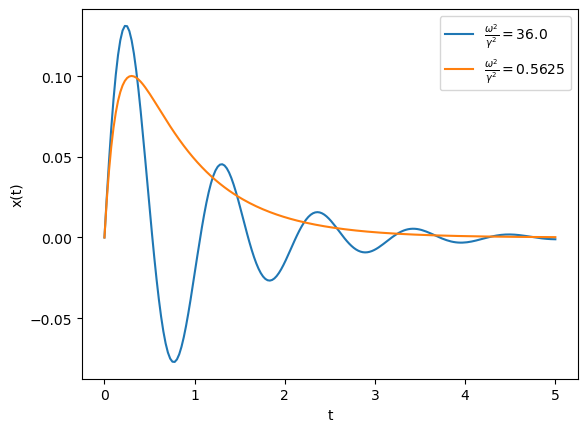

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define function for the exact solution
def x(t,gamma,omega):
    n1 = np.exp(-gamma*t)/(2*np.sqrt(gamma**2 - omega**2,dtype=complex))
    t1 = np.exp(gamma*np.sqrt(1 - omega**2 /gamma**2,dtype=complex)*t) 
    t2 = np.exp(-gamma*np.sqrt(1 - omega**2 /gamma**2,dtype=complex)*t)
    return n1*(t1 - t2)
# Define time grid to evaluate x(t) on
tArr = np.linspace(0,5,200)

# parameters for producing wave solutions
omega_wave = 6
gamma_wave = 1 
xArr_wave = x(tArr,gamma_wave,omega_wave)

# parameters for producing exponential solutions
omega_exp = 3
gamma_exp = 4
xArr_exp = x(tArr,gamma_exp,omega_exp)

#plot the two solutions
plt.plot(tArr,np.real(xArr_wave),label=r'$\frac{\omega^{2}}{\gamma^{2}} = $'+f'{(omega_wave/gamma_wave)**2}')
plt.plot(tArr,np.real(xArr_exp),label=r'$\frac{\omega^{2}}{\gamma^{2}} =$' +f'{(omega_exp/gamma_exp)**2}')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

# Numerical Solution
Now for fun, lets solve the same differential equation using scipy's ode integrator. Scipy's integration package requires one to rewrite your differential equation as a system of first order equations. Define the following
$$
\begin{align}
x &= u \\
\frac{dx}{dt} &= v
\end{align}
$$
Then, the 2nd order ODE becomes 
$$
\begin{align}
\frac{du}{dt} &= v \\
\frac{dv}{dt} &= -2 \gamma v - \omega^{2} u
\end{align}
$$

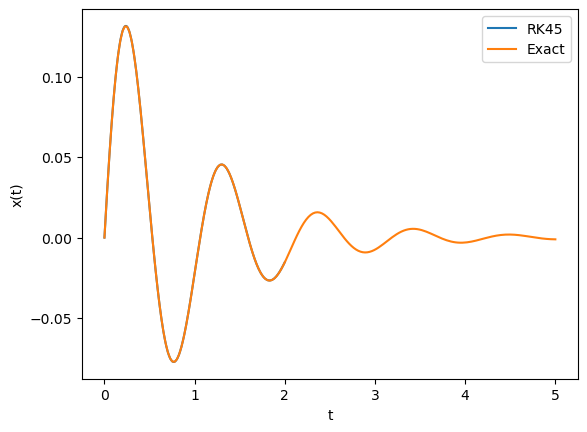

In [18]:
from scipy.integrate import solve_ivp

# initial conditions y0 = [x(t=0), dx/dt (t=0)]
y0 = [0.0, 1.0] 

# Define a function for scipy integrator to use.
def system(t,y, params):
    u, v = y
    dydt = [v, -2*params[0]*v - params[1]**2 *u]
    return dydt

sol = solve_ivp(system,t_span=[0,5],y0 = y0,t_eval= np.linspace(0,2,1000), args=[(gamma_wave, omega_wave)],method='RK45',dense_output=True)

plt.plot(sol.t, sol.y[0],label='RK45')
plt.plot(tArr,np.real(xArr_wave),label='Exact')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

# Example combining Contour Integration and Fourier Transforms

Okay, so we've seen how complex numbers emerge naturally in systems like the damped oscillator which we can still solve with normal approaches, and we have seen cases where we used a Fourier Transform to reveal hidden underlying dynamics. Can we consider a slightly more complicated system where the methods to solve ODEs might not be so easy? Yes, we can! If we consider a case where a damped oscillator is being driven by some other oscillating force our ODE solution from above is not the only thing we need to use. Let's take a look at what we mean.

The form for a driven-damped oscillator is quite similar to before this time with a driving oscillating force $F(t)$
\begin{equation}
\frac{d^{2}x}{dt^{2}} + 2\gamma \frac{dx}{dt} + \omega_0^2 x = F(t).
\end{equation}
To some, this might not look too scary; to others, we are terrified - but that's okay, we'll get through it! The thing that is complicating our lives right now is a oscillating force, and something you should always keep in mind is that oscillating things can be Fourier transformed! It may not always help, but it might be a good start when you're stuck on a problem. Let's try that now.

Again, Fourier transforms allow us to go from a time domain $t$ to frequency domain $\omega$ so our equation
\begin{equation}
\left(\frac{d^{2}}{dt^{2}} + 2\gamma \frac{d}{dt} + \omega_0^2\right) x(t) = F(t)
\end{equation}
is transformed as
\begin{align}
\left(\frac{d^{2}}{dt^{2}} + 2\gamma \frac{d}{dt} + \omega_0^2\right) \frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty e^{-i\omega t} x(t)dt &= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty e^{-i\omega t} F(t)dt \\
\frac{1}{\sqrt{2\pi}} \left(-\omega^2 + 2i \omega \gamma + \omega_0^2\right)  x(\omega) &= F(\omega)
\end{align}
We can then solve for our frequency domain motion much more easily since we've eliminated the derivative terms in our transformed equation
\begin{equation}
x(\omega) = \frac{\sqrt{2\pi}F(\omega)}{-\omega^2 + 2i \omega \gamma + \omega_0^2}.
\end{equation}
Now that we have this form we can begin the process of transforming back to get a time domain solution
\begin{equation}
x(t) = \int_{-\infty}^\infty \frac{F(\omega)}{-\omega^2 + 2i \omega \gamma + \omega_0^2} e^{i \omega t} d\omega.
\end{equation}
But you might be thinking, "wait this integral doesn't seem any easier than the original differential equation!"

Well, this is the perfect time to introduce a new surprise tool called contour integration. If we make a slight transformation of our frequency to some general complex number i.e. $\omega \rightarrow z$ we end up with the following
\begin{equation}
\int_{-\infty}^\infty \frac{F(z)}{-z^2 + 2i z \gamma + \omega_0^2} e^{i z t} dz
\end{equation}
or a complex function with complex variables. Why did we do this? Well under normal (real) circumstances, when we integrate we are collecting all the infinitesmal quantities under a domain which produces our result - think area under a curve. To go from point $a$ to point $b$ on the domain, there is only one direction you can move in, so only one choice for your integral path. With complex numbers our domain isn't just along a line, there is now a second (imaginary) dimension. So if we wanted to know all of the contribution from one domain to another, how many options are there to get there? The answer is too many paths are possible!

What we do instead is say that if we consider the integration of a half-circle in one region of our complex plane, if there is no interesting singularities (essentially roots of our system) then our contour integral loop which starts and ends at the same point will be zero. If there is something interesting inside the contour, then we end up collecting the effect in what is called a Residue!

Let's actually start the process to understand things. First, we need to see if there are any singularities (roots) in the denominator
\begin{equation}
0 = -z^2 + 2i z \gamma + \omega_0^2 \Rightarrow z = i\gamma \pm \frac{1}{2} \sqrt{(2i\gamma)^2 + 4 \omega_0^2} = \gamma \left(i \pm \sqrt{\frac{\omega_0^2}{\gamma^2} - 1} \right) = z_\pm.
\end{equation}
We can plot these roots in the complex plane.

(-5.0, 5.0)

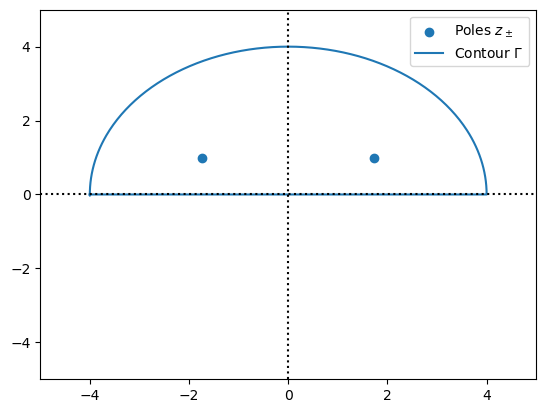

In [46]:
# Set values for omega_0 and gamma
omega_0 = 2
gamma = 1

# Let's set some maximum value R to be the contour radius
R = 4

# Make our contour angle range from 0 to pi
dtheta = 0.01
theta = np.arange(0,np.pi+dtheta, dtheta)
contour_z = R * np.exp(1j * theta)

# Add in endpoints for contour
contour_z = np.concatenate([np.array([-R], dtype=complex), contour_z, np.array([-R], dtype=complex)])

# Calculate roots as a list comprehension for plus and minus 1
roots_z = [gamma * (1j + sign * np.sqrt(((omega_0**2) / (gamma**2)) - 1, dtype=complex)) for sign in [-1,1]]

# Make subplot
fig, ax = plt.subplots(1,1)

# plot data on subplot
ax.scatter(np.real(roots_z), np.imag(roots_z), label=r'Poles $z_\pm$')

# Draw the contour
ax.plot(np.real(contour_z), np.imag(contour_z), label=r'Contour $\Gamma$')

# Add in axes lines just to help see things
ax.axhline(0, color='k', linestyle=':')
ax.axvline(0, color='k', linestyle=':')

ax.legend()
ax.set_xlim([-R-1, R+1])
ax.set_ylim([-R-1, R+1])

We see then that inside our arbitrary loop, we encompass the two roots of our solution. We can now use the Residue Theorem to get the exact form of our solution as long as our contour loop is big enough to capture the poles. 

<details>
  <summary>If you don't recall the residue theorem click here to see an example.</summary>

  ---

  The Residue Theorem is [outlined in many locations](https://mathworld.wolfram.com/ResidueTheorem.html) in its derivation, but the important thing to know are the two cases of solutions:

  \begin{align}
  \oint_\Gamma f(z) dz = 0 \quad & {\rm for \; no \; poles \; inside} \\
  \oint_\Gamma f(z) dz = 2\pi i\sum_{a\in A} {\rm Res}_{z=a_i} \left[ f(z)\right] \quad & {\rm for \; set \; of \;}A {\rm \; poles \; inside}
  \end{align}

  The Residue of a function is the remainder of the function when isolating a single pole at a given value. For example, if we have the equation $f(z) = \frac{5z - 2}{z(z-1)}$ we note that it contains poles when $z=0, 1$. The residues for these are then determined by

  \begin{align}
  {\rm Res}_{z=0} \left[ f(z)\right] = {\rm Res}_{z=0} \left[ z \frac{5z - 2}{(z-1)} \right] = 2 \\
  {\rm Res}_{z=1} \left[ f(z)\right] = {\rm Res}_{z=1} \left[ (z-1) \frac{5z - 2}{z} \right] = 3
  \end{align}
  where the key is that we multiply each component of the function by the term which would lead to the pole. In other words, for each denominator term that produces a zero, we must introduce an operation which cancels it for the residue to be found. Then our total solution is the sum of the residues
  
  \begin{equation}
  \oint_\Gamma f(z) dz = 2\pi i \left({\rm Res}_{z=0} \left[ f(z)\right] + {\rm Res}_{z=1} \left[ f(z)\right] \right) = 2 \pi i (2 + 3) = 10 \pi i
  \end{equation}

  ---
  
</details>

Before we get into the contour integration, we will also rewrite our denominator in the alternate quadratic form
\begin{equation}
-z^2 + 2i z \gamma + \omega_0^2 = (z - z_-) (z - z_+).
\end{equation}
Now we can either do the entire Residue theorem for the total contour or we can divide our contour into two contours and get one residue each (we show this in the modified plot below).

(-5.0, 5.0)

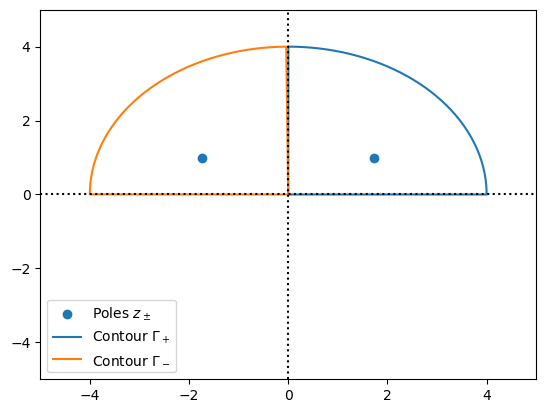

In [47]:
# Make our contour angle range from 0 to pi
dtheta = 0.01
theta_plus = np.arange(0,np.pi/2, dtheta)
theta_minus = np.arange(np.pi/2+dtheta, np.pi, dtheta)
contour_z_plus = R * np.exp(1j * theta_plus)
contour_z_minus = R * np.exp(1j * theta_minus)

# Add in endpoints for contour
contour_z_plus = np.concatenate([np.array([0], dtype=complex), contour_z_plus, np.array([0], dtype=complex)])
contour_z_minus = np.concatenate([np.array([0], dtype=complex), contour_z_minus, np.array([0], dtype=complex)])

# Make subplot
fig, ax = plt.subplots(1,1)

# plot data on subplot
ax.scatter(np.real(roots_z), np.imag(roots_z), label=r'Poles $z_\pm$')

# Draw the contour
ax.plot(np.real(contour_z_plus), np.imag(contour_z_plus), label=r'Contour $\Gamma_+$')
ax.plot(np.real(contour_z_minus), np.imag(contour_z_minus), label=r'Contour $\Gamma_-$')

# Add in axes lines just to help see things
ax.axhline(0, color='k', linestyle=':')
ax.axvline(0, color='k', linestyle=':')

ax.legend()
ax.set_xlim([-R-1, R+1])
ax.set_ylim([-R-1, R+1])

We separate the contour integral as
\begin{equation}
\oint_\Gamma e^{izt} \frac{F(z)}{(z - z_-) (z - z_+)} = \oint_{\Gamma_+} \frac{1}{(z - z_-)} \left(\frac{e^{izt} F(z)}{(z - z_+)} \right) + \oint_{\Gamma_-} \frac{1}{(z - z_+)} \left(\frac{e^{izt} F(z)}{(z - z_-)} \right)
\end{equation}
which we can then see that each one will have only one residue contributing to our total solution. These are
\begin{align}
\oint_{\Gamma_+} \frac{1}{(z - z_-)} \left(\frac{e^{izt} F(z)}{(z - z_+)} \right) =
2 \pi i{\rm Res}_{z=z_-} \left[ (z - z_-) f(z_-)\right] = 2\pi i \frac{e^{iz_-t} F(z_-)}{(z_- - z_+)} \\
\nonumber \\
\oint_{\Gamma_-} \frac{1}{(z - z_+)} \left(\frac{e^{izt} F(z)}{(z - z_-)} \right) = 2 \pi i{\rm Res}_{z=z_+} \left[ (z - z_+) f(z_+)\right] = 2\pi i \frac{e^{iz_+t} F(z_+)}{(z_+ - z_-)}
\end{align}
which we sum together to get
\begin{equation}
x(t) = \oint_\Gamma e^{izt} \frac{F(z)}{(z - z_-) (z - z_+)} = \frac{2\pi i}{(z_- - z_+)} \left(e^{iz_-t} F(z_-) - e^{iz_+t} F(z_+)\right).
\end{equation}
Now we have an equation of motion and we can find initial conditions using our solutions for the poles. At this point, it would be good to assign some actual function to our driving force. Let's arbitrarily pick
\begin{equation}
F(t) = \frac{\sin (\Omega t)}{t}
\end{equation}
which is a so-called sinc (like a kitchen "sink") function with forcing frequency $\Omega$. This means then that our $F(z_\pm)$ are
\begin{align}
F(z_-) =  \frac{\sin \left( \Omega \gamma \left(i - \sqrt{\frac{\omega_0^2}{\gamma^2} - 1} \right) \right)}{\gamma \left(i - \sqrt{\frac{\omega_0^2}{\gamma^2} - 1} \right)} \\
F(z_-) =  \frac{\sin \left( \Omega \gamma \left(i + \sqrt{\frac{\omega_0^2}{\gamma^2} - 1} \right) \right)}{\gamma \left(i + \sqrt{\frac{\omega_0^2}{\gamma^2} - 1} \right)} 
\end{align}


$$
z_\pm = \gamma \left(i \pm \sqrt{\frac{\omega_0^2}{\gamma^2} - 1} \right).
$$

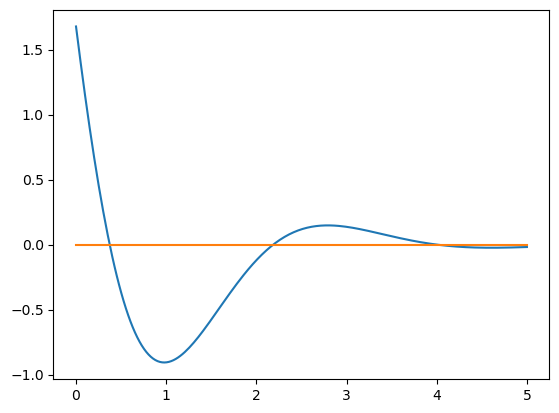

In [49]:
# Define our driving frequency Omega
Omega_drive = 1

# Now we can plug in our roots and get our oscillating function. Recall z_- = roots_z[0] and z_+ = roots_z[1]
F_z_minus = np.sin(Omega_drive * roots_z[0]) / roots_z[0]
F_z_plus = np.sin(Omega_drive * roots_z[1]) / roots_z[1]
x_driven_damped = (2 * np.pi *1j / (roots_z[0] - roots_z[1])) * (np.exp(1j * roots_z[0] * tArr) * F_z_minus - np.exp(1j * roots_z[1] * tArr) * F_z_plus)

plt.plot(tArr, np.real(x_driven_damped))
plt.plot(tArr, np.imag(x_driven_damped))

C:\Users\1josh\AppData\Local\Temp\ipykernel_4284\1012310044.py:5: RuntimeWarning: invalid value encountered in divide
  F_z_minus = np.sin(Omega_drive * roots_z[0] * tArr) / (roots_z[0] * tArr)
C:\Users\1josh\AppData\Local\Temp\ipykernel_4284\1012310044.py:6: RuntimeWarning: invalid value encountered in divide
  F_z_plus = np.sin(Omega_drive * roots_z[1] * tArr) / (roots_z[1] * tArr)


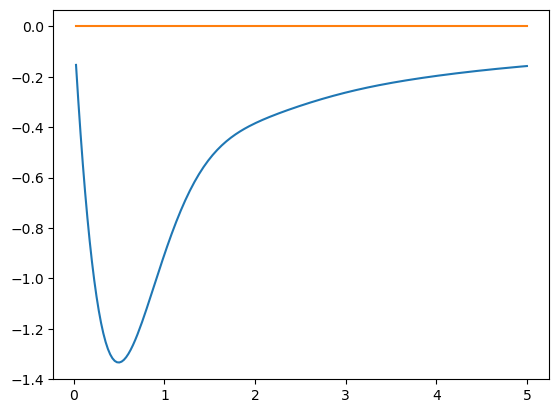

In [60]:
# Define our driving frequency Omega
Omega_drive = 1

# Now we can plug in our roots and get our oscillating function. Recall z_- = roots_z[0] and z_+ = roots_z[1]
F_z_minus = np.sin(Omega_drive * roots_z[0] * tArr) / (roots_z[0] * tArr)
F_z_plus = np.sin(Omega_drive * roots_z[1] * tArr) / (roots_z[1] * tArr)
x_driven_damped = (2 * np.pi *1j / (roots_z[0] - roots_z[1])) * (np.exp(1j * roots_z[0] * tArr) * F_z_minus - np.exp(1j * roots_z[1] * tArr) * F_z_plus)

plt.plot(tArr, np.real(x_driven_damped))
plt.plot(tArr, np.imag(x_driven_damped))

Let's check the numerical solution!

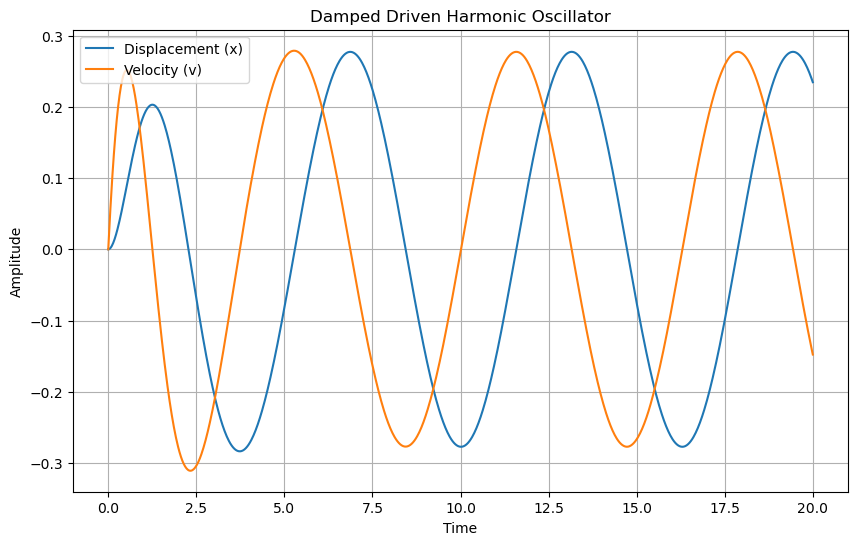

In [69]:
# Define the parameters for the system
# m = 1.0  # mass
c = 0.2  # damping coefficient
# k = 1.0  # spring constant
F0 = 1.0  # amplitude of driving force
omega = Omega_drive  # angular frequency of driving force

# Define the driving force as a function of time
def F(t):
    return F0 * np.cos(omega * t)

# Define the system of differential equations
def damped_driven_harmonic_oscillator(t, y):
    x1, x2 = y
    dx1dt = x2
    # dx2dt = (F(t) - c * x2 - k * x1) / m
    dx2dt = F(t) - 2 * gamma * x2 - omega_0**2 * x1
    return [dx1dt, dx2dt]

# Initial conditions: x(0) = 0, v(0) = 0
y0 = [0.0, 0.0]

# Time span for the integration
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of differential equations
solution = solve_ivp(damped_driven_harmonic_oscillator, t_span, y0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='Displacement (x)')
plt.plot(solution.t, solution.y[1], label='Velocity (v)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Damped Driven Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()


We separate the contour integral as
\begin{equation}
\oint_\Gamma e^{izt} \frac{F(z)}{(z - z_-) (z - z_+)} = \oint_{\Gamma_+} \frac{1}{(z - z_-)} \left(\frac{e^{izt} F(z)}{(z - z_+)} \right) + \oint_{\Gamma_-} \frac{1}{(z - z_+)} \left(\frac{e^{izt} F(z)}{(z - z_-)} \right)
\end{equation}
which we can then see that each one will have only one residue contributing to our total solution. These are
\begin{align}
\oint_{\Gamma_+} \frac{1}{(z - z_-)} \left(\frac{e^{izt} F(z)}{(z - z_+)} \right) =
2 \pi i{\rm Res}_{z=z_-} \left[ (z - z_-) f(z_-)\right] = 2\pi i \frac{e^{iz_-t} F(z_-)}{(z_- - z_+)} \\
\nonumber \\
\oint_{\Gamma_-} \frac{1}{(z - z_+)} \left(\frac{e^{izt} F(z)}{(z - z_-)} \right) = 2 \pi i{\rm Res}_{z=z_+} \left[ (z - z_+) f(z_+)\right] = 2\pi i \frac{e^{iz_+t} F(z_+)}{(z_+ - z_-)}
\end{align}
which we sum together to get
\begin{equation}
x(t) = \oint_\Gamma e^{izt} \frac{F(z)}{(z - z_-) (z - z_+)} = \frac{2\pi i}{(z_- - z_+)} \left(e^{iz_-t} F(z_-) - e^{iz_+t} F(z_+)\right).
\end{equation}
Now we have an equation of motion and we can find initial conditions using our solutions for the poles. We have unfortunately neglected one thing



At this point, it would be good to assign some actual function to our driving force. Let's arbitrarily pick
\begin{equation}
F(t) = \frac{\sin (\Omega t)}{t}
\end{equation}
which is a so-called sinc (like a kitchen "sink") function with forcing frequency $\Omega$. This means then that our $F(z_\pm)$ are
\begin{align}
F(z_-) =  \frac{\sin \left( \Omega \gamma \left(i - \sqrt{\frac{\omega_0^2}{\gamma^2} - 1} \right) \right)}{\gamma \left(i - \sqrt{\frac{\omega_0^2}{\gamma^2} - 1} \right)} \\
F(z_-) =  \frac{\sin \left( \Omega \gamma \left(i + \sqrt{\frac{\omega_0^2}{\gamma^2} - 1} \right) \right)}{\gamma \left(i + \sqrt{\frac{\omega_0^2}{\gamma^2} - 1} \right)} 
\end{align}
We will also assign our initial conditions as some $x(0)=x_0$ and $\frac{dx}{dt}_{t=0}=\dot{x}(0)=v_0$. Using our initial conditions we get
\begin{align}
x(t=0) = x_0 = \frac{2\pi i}{(z_- - z_+)} \left(e^{0} F(z_-) - e^{0} F(z_+)\right) \\
\dot{x}(t=0) = v_0 = \frac{2\pi i}{(z_- - z_+)} \left(iz_- e^{0} F(z_-) - i z_+ e^{0} F(z_+)\right) 
\end{align}

$$
z_\pm = \gamma \left(i \pm \sqrt{\frac{\omega_0^2}{\gamma^2} - 1} \right).
$$